<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-04-22 13:34:04--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  71.5MB/s    in 2.8s    

2025-04-22 13:34:07 (71.5 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 184.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 164.9 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 176.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 165.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 161.3 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


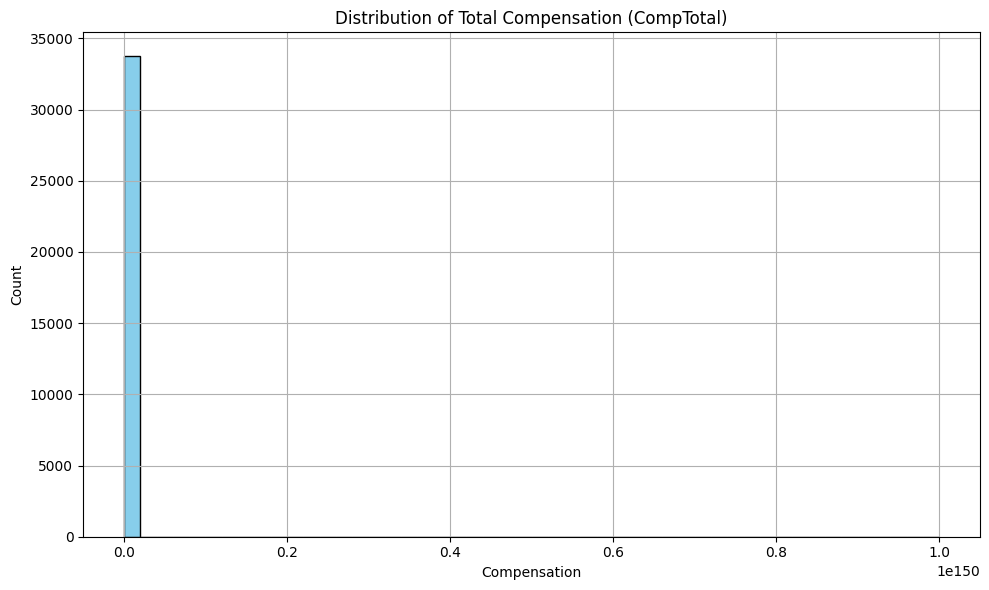

In [12]:
## Write your code here
 # Histogram of CompTotal
query_1 = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"
comp_data = pd.read_sql_query(query_1, conn)
plt.figure(figsize=(10, 6))
plt.hist(comp_data['CompTotal'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('Compensation')
plt.ylabel('Count')
# plt.xlim(0, comp_data['CompTotal'].quantile(0.95))
plt.grid(True)
plt.tight_layout()
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


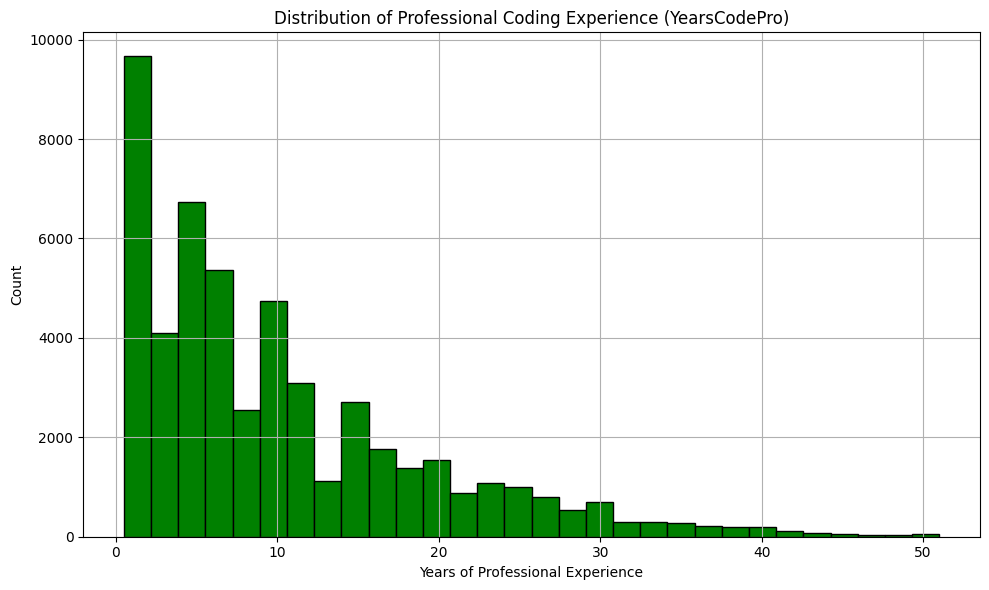

In [14]:
## Write your code here
# Histogram of YearsCodePro
query_2 = "SELECT YearsCodePro FROM main WHERE YearsCodePro IS NOT NULL"
years_data = pd.read_sql_query(query_2, conn)

def clean_years(val):
    if val == 'Less than 1 year':
        return 0.5
    elif val == 'More than 50 years':
        return 51
    try:
        return float(val)
    except:
        return None

years_data['YearsCodePro'] = years_data['YearsCodePro'].apply(clean_years)
years_data.dropna(inplace=True)

plt.figure(figsize=(10, 6))
plt.hist(years_data['YearsCodePro'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Professional Coding Experience (YearsCodePro)')
plt.xlabel('Years of Professional Experience')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


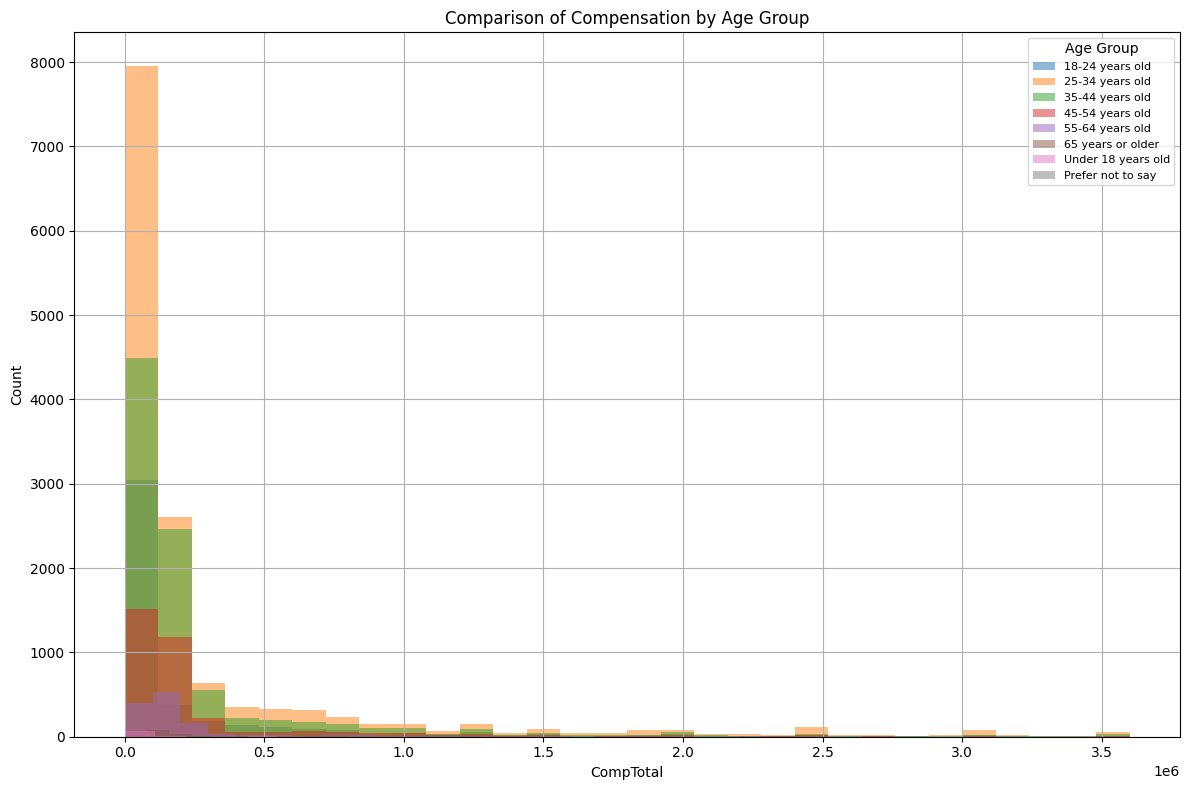

In [16]:
## Write your code here
# Histogram Comparison of CompTotal by Age Group
query_3 = "SELECT Age, CompTotal FROM main WHERE Age IS NOT NULL AND CompTotal IS NOT NULL"
df = pd.read_sql_query(query_3, conn)

# Filter out extreme outliers for readability
df = df[df['CompTotal'] <= df['CompTotal'].quantile(0.95)]

df_age = df['Age'].unique()

plt.figure(figsize=(12, 8))
for df_age in df_age:
    group_data = df[df['Age'] == df_age]['CompTotal']
    plt.hist(group_data, bins=30, alpha=0.5, label=df_age)

plt.title('Comparison of Compensation by Age Group')
plt.xlabel('CompTotal')
plt.ylabel('Count')
plt.legend(title='Age Group', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


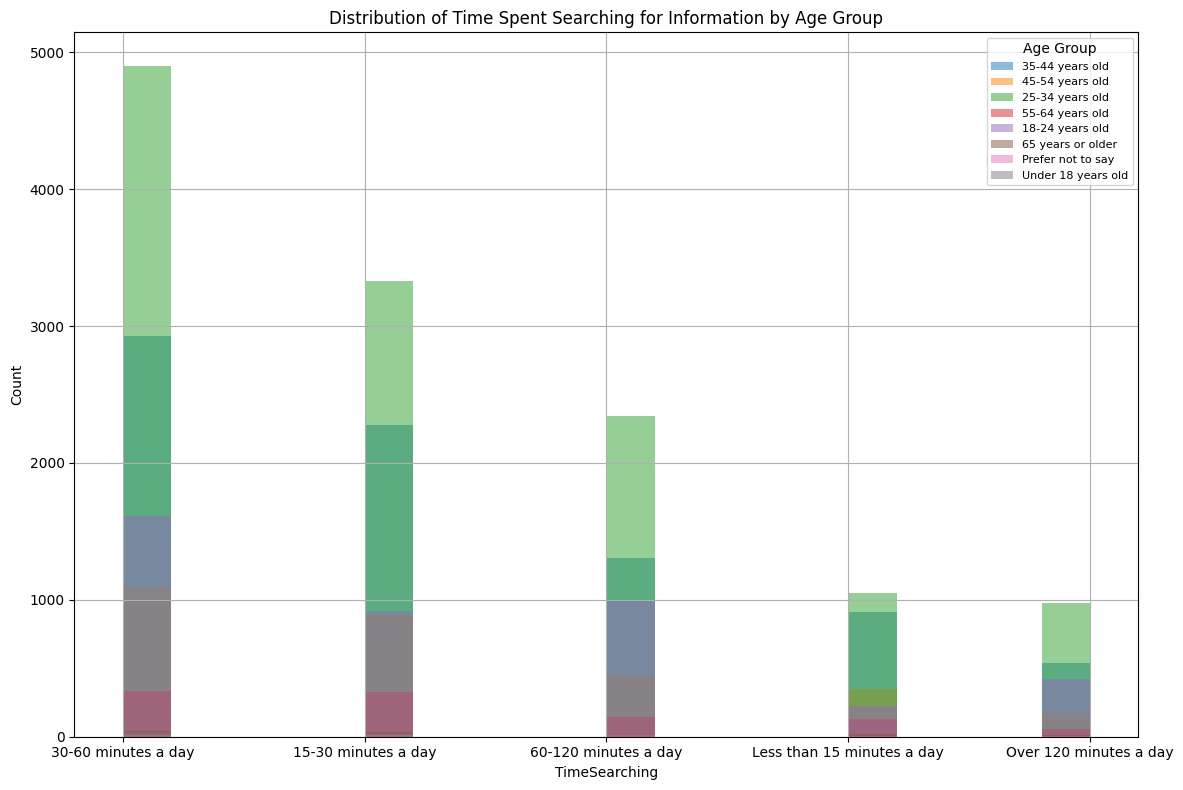

In [18]:
# Write your code here
# Histogram of TimeSearching for diff ages
query_4 = "SELECT Age, TimeSearching FROM main WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL"
df = pd.read_sql_query(query_4, conn)
df_age = df['Age'].unique()

plt.figure(figsize=(12, 8))
for df_age in df['Age'].unique():
    group_data = df[df['Age'] == df_age]['TimeSearching']
    plt.hist(group_data, bins=20, alpha=0.5, label=df_age)

plt.title('Distribution of Time Spent Searching for Information by Age Group')
plt.xlabel('TimeSearching')
plt.ylabel('Count')
plt.legend(title='Age Group', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


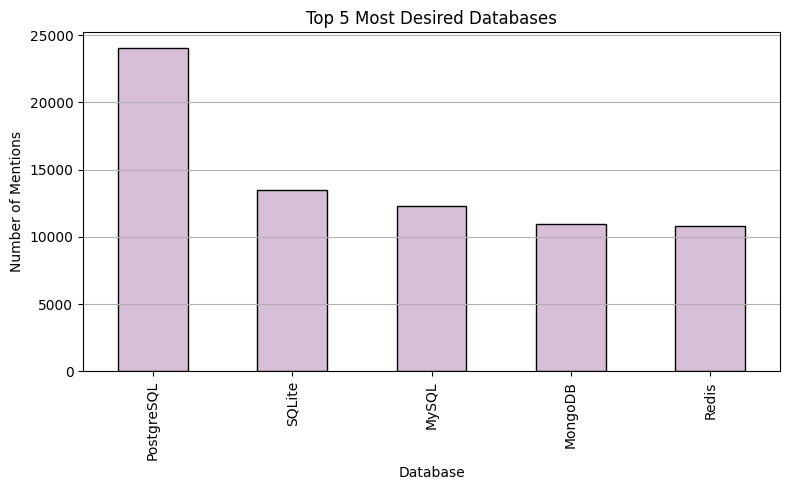

In [26]:
## Write your code here
# Histogram of Most Desired Databases (Top 5)
query = "SELECT DatabaseWantToWorkWith FROM main WHERE DatabaseWantToWorkWith IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Split the semicolon-separated values and flatten into a single list
all_dbs = df['DatabaseWantToWorkWith'].str.split(';')
flat_list = [item.strip() for sublist in all_dbs.dropna() for item in sublist]

# Create a DataFrame and count occurrences
db_df = pd.Series(flat_list).value_counts().nlargest(5)

# Plot
plt.figure(figsize=(8, 5))
db_df.plot(kind='bar', color='thistle', edgecolor='black')
plt.title('Top 5 Most Desired Databases')
plt.xlabel('Database')
plt.ylabel('Number of Mentions')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


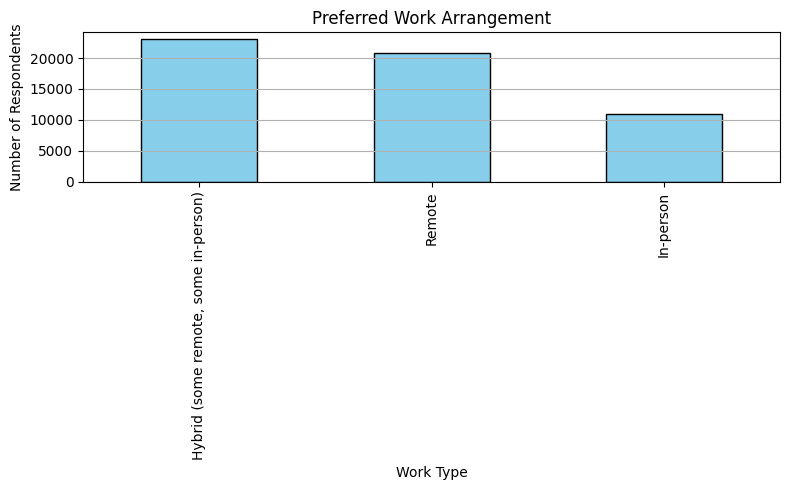

In [23]:
## Write your code here
# Histogram of Preferred Work Locations (RemoteWork)
query = "SELECT RemoteWork FROM main WHERE RemoteWork IS NOT NULL"
df = pd.read_sql_query(query, conn)

plt.figure(figsize=(8, 5))
df['RemoteWork'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Preferred Work Arrangement')
plt.xlabel('Work Type')
plt.ylabel('Number of Respondents')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


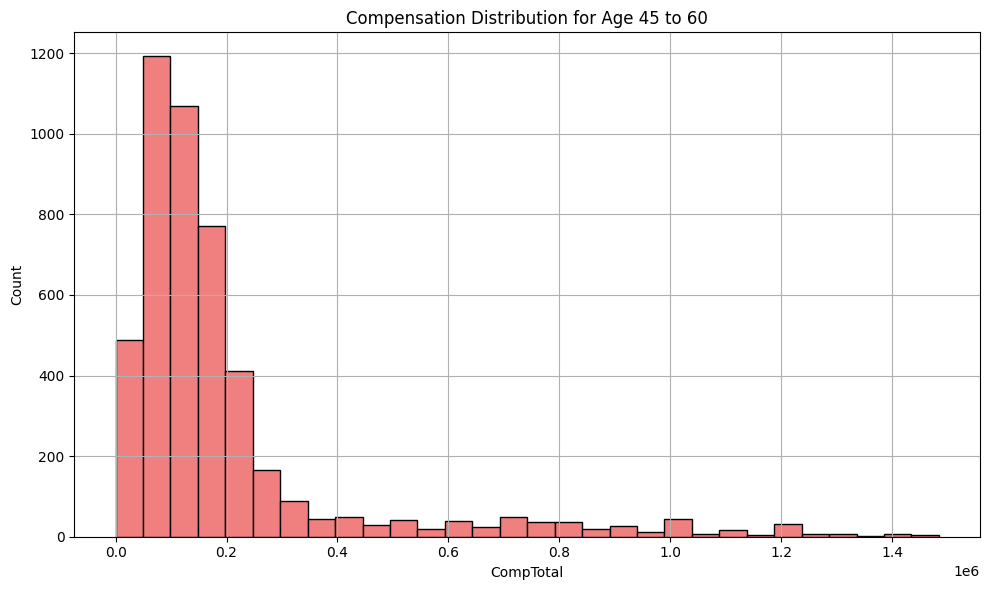

In [24]:
## Write your code here
# Histogram of Median CompTotal for Ages 45 to 60
query = "SELECT Age, CompTotal FROM main WHERE Age IS NOT NULL AND CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Filter only 45 to 60 age group
age_range = ['45-54 years old', '55-64 years old', '65 years or older']
df = df[df['Age'].isin(age_range)]
df = df[df['CompTotal'] <= df['CompTotal'].quantile(0.95)]  # Optional: remove outliers

plt.figure(figsize=(10, 6))
plt.hist(df['CompTotal'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Compensation Distribution for Age 45 to 60')
plt.xlabel('CompTotal')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


/tmp/ipykernel_301/2189689185.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('YearsBucket')['JobSat'].value_counts().unstack().plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

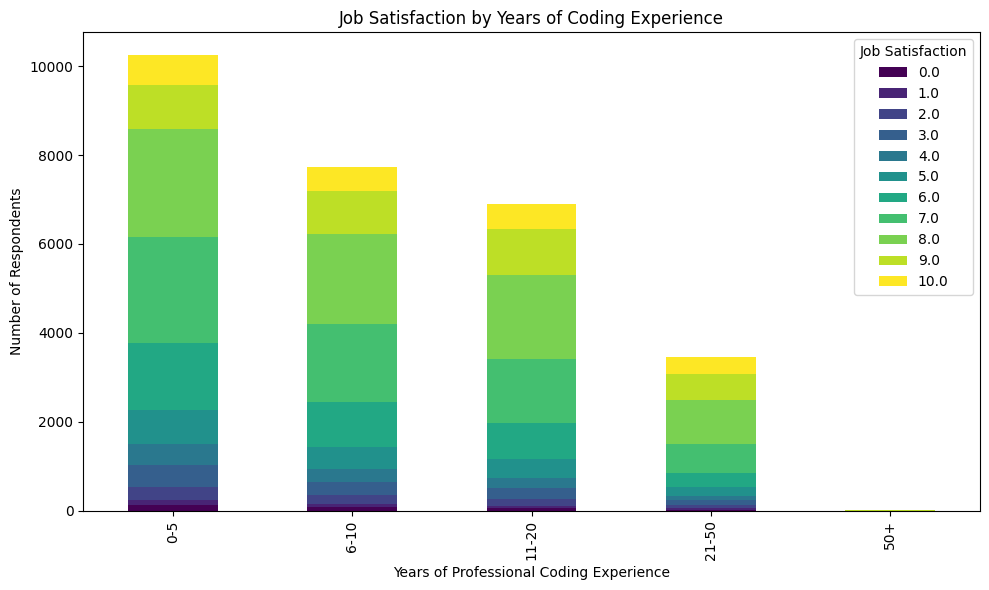

In [25]:
## Write your code here
# Histogram of JobSat by YearsCodePro
query = "SELECT YearsCodePro, JobSat FROM main WHERE YearsCodePro IS NOT NULL AND JobSat IS NOT NULL"
df = pd.read_sql_query(query, conn)

def clean_years(val):
    if val == 'Less than 1 year':
        return 0.5
    elif val == 'More than 50 years':
        return 51
    try:
        return float(val)
    except:
        return None

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_years)
df.dropna(inplace=True)

# Categorize YearsCodePro into bins
df['YearsBucket'] = pd.cut(df['YearsCodePro'], bins=[0, 5, 10, 20, 50, 100], labels=['0-5', '6-10', '11-20', '21-50', '50+'])

plt.figure(figsize=(10, 6))
df.groupby('YearsBucket')['JobSat'].value_counts().unstack().plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Job Satisfaction by Years of Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Number of Respondents')
plt.legend(title='Job Satisfaction')
plt.tight_layout()
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [27]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
